#  GCP에서 데이터 불러오기

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'avian-slice-386906' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()


# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_1de5ab02_188d6553f5b') # Job ID inserted based on the query results selected to explore
# print(job.query)


# Running this code will read results from your previous job

job = client.get_job('bquxjob_1de5ab02_188d6553f5b') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,USER_ID_hash,REG_DATE,SEX_ID,AGE,PREF_NAME,Tr_Pref_Name,small_area_name,Tr_small_area_name,capsule_text,Translated_capsule_text,...,usable_date_thu,usable_date_fri,usable_date_sat,usable_date_sun,usable_date_holiday,usable_date_before_holiday,Male,Female,usable_date_sum,view_count
0,c7e54ff7b173bdca9323605baa989809,2011-02-17 16:22:44+00:00,m,64,奈良県,나라현,福岡,후쿠오카,その他,기타,...,0,0,0,0,0,0,1,0,0,627
1,3a35763978af4042550f9d1dbabe8e0a,2012-05-24 22:02:05+00:00,f,28,None,None,新宿・高田馬場・中野・吉祥寺,신주코・타카다바바・나카노・요시노,その他,기타,...,0,0,0,0,0,0,0,1,0,424
2,efb26b7cc8a2e43584fbf60d38ffd978,2012-03-31 09:08:57+00:00,m,35,東京都,도쿄도,新宿・高田馬場・中野・吉祥寺,신주코・타카다바바・나카노・요시노,その他,기타,...,0,0,0,0,0,0,1,0,0,424
3,4ca9953169c95d5584efdd4247a09c1c,2011-03-11 22:27:28+00:00,f,42,兵庫県,효고현,川崎・湘南・箱根他,카와사키・신난・하코네타,その他,기타,...,0,0,0,0,0,0,0,1,0,86
4,4966ba17c575d570ea248ea0ecc9c65a,2010-11-08 22:45:09+00:00,m,55,滋賀県,시가현,和歌山,와카야마,その他,기타,...,0,0,0,0,0,0,1,0,0,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517201,4a4429925036398e286785b508c39051,2012-02-21 20:26:13+00:00,m,46,None,None,愛知,아이치,リラクゼーション,휴식,...,1,1,1,1,1,1,1,0,8,82
2517202,6c318353b8ecb079fcb5e4ea8c603bf8,2011-08-18 17:00:49+00:00,m,50,東京都,도쿄도,恵比寿・目黒・品川,에비스・메구로・시나가와,リラクゼーション,휴식,...,1,1,1,1,1,1,1,0,9,12
2517203,630f6a39ed98014e279641817938a2a4,2011-02-20 01:08:45+00:00,f,45,兵庫県,효고현,ミナミ他,미나미타,リラクゼーション,휴식,...,1,1,1,1,1,1,0,1,8,56
2517204,2c6f9aa4d4864ec1368e6fc9508b5735,2011-12-01 20:41:29+00:00,f,42,None,None,キタ,키타,リラクゼーション,휴식,...,1,1,1,1,1,1,0,1,9,183


# 2. 데이터 확인하기

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

,AGE,PURCHASE_FLG,dispperiod,usable_date_mon,usable_date_tue,usable_date_wed,usable_date_thu,usable_date_fri,usable_date_sat,usable_date_sun,usable_date_holiday,usable_date_before_holiday,Male,Female,usable_date_sum,view_count
count,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0
mean,47.300553,0.048621,3.786802,0.582664,0.58988,0.598368,0.600991,0.581321,0.521834,0.534876,0.534876,0.534876,0.45557,0.54443,5.079688,432.860096
std,11.23943,0.215074,3.000429,0.493119,0.491855,0.490228,0.489695,0.493343,0.499523,0.498782,0.498782,0.498782,0.498022,0.498022,4.170009,1176.083429
min,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,39.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0
50%,48.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,8.0,216.0
75%,55.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,435.0
max,80.0,1.0,36.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,14779.0


In [ ]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = results
df = df.dropna()
df.columns

Index(['USER_ID_hash', 'REG_DATE', 'SEX_ID', 'AGE', 'PREF_NAME',
       'Tr_Pref_Name', 'small_area_name', 'Tr_small_area_name', 'capsule_text',
       'Translated_capsule_text', 'Translated_genre_name', 'PURCHASE_FLG',
       'VIEW_COUPON_ID_hash', 'dispperiod', 'dispfrom', 'dispend',
       'coupon_id_hash', 'usable_date_mon', 'usable_date_tue',
       'usable_date_wed', 'usable_date_thu', 'usable_date_fri',
       'usable_date_sat', 'usable_date_sun', 'usable_date_holiday',
       'usable_date_before_holiday', 'Male', 'Female', 'usable_date_sum',
       'view_count'],
      dtype='object')

In [ ]:
len(df['AGE'])

2033884

## 1-1. 명목형 데이터 확인

In [ ]:
cat_col_names = ['USER_ID_hash', 'PREF_NAME','Tr_Pref_Name','VIEW_COUPON_ID_hash',
                 'small_area_name','Tr_small_area_name','capsule_text','Translated_capsule_text',
                 'Translated_genre_name','usable_date_sum']

def view_cate_unique(cat_col_names):
  for col_name in cat_col_names:
    cat_values = np.unique(df[col_name])
    print(f"{col_name}: {cat_values}\n")

view_cate_unique(cat_col_names)

USER_ID_hash: ['00035b86e6884589ec8d28fbf2fe7757' '000cc06982785a19e2a2fdb40b1c9d59'
 '0013518e41c416cd6a181d277dd8ca0b' ... 'fff970d2014c3e10a77e38d540239017'
 'fffafc024e264d5d539813444cf61199' 'ffff56dbf3c782c3532f88c6c79817ba']

PREF_NAME: ['三重県' '京都府' '佐賀県' '兵庫県' '北海道' '千葉県' '和歌山県' '埼玉県' '大分県' '大阪府' '奈良県' '宮城県'
 '宮崎県' '富山県' '山口県' '山形県' '山梨県' '岐阜県' '岡山県' '岩手県' '島根県' '広島県' '徳島県' '愛媛県'
 '愛知県' '新潟県' '東京都' '栃木県' '沖縄県' '滋賀県' '熊本県' '石川県' '神奈川県' '福井県' '福岡県' '福島県'
 '秋田県' '群馬県' '茨城県' '長崎県' '長野県' '青森県' '静岡県' '香川県' '高知県' '鳥取県' '鹿児島県']

Tr_Pref_Name: ['경토부' '고치현' '기후현' '꾸마현' '나가노현' '나가사키현' '나라현' '니가타현' '도야마현' '도치기현' '도쿄도'
 '도토리현' '미야기현' '미야자키현' '미에현' '사가현' '사이타마현' '시가현' '시마네현' '시즈오카현' '아오모리현'
 '아이치현' '아키타현' '야마가타현' '야마구치현' '야마나시현' '에히메현' '오사카부' '오이타현' '오카야마현'
 '오키나와현' '와카야마현' '이바라키현' '이시카와현' '이와테현' '치바현' '카가와현' '카고시마현' '칸나가와현'
 '쿠마모토현' '토쿠시마현' '홋카이도' '효고현' '후쿠시마현' '후쿠오카현' '후쿠이현' '히로시마현']

VIEW_COUPON_ID_hash: ['000eba9b783cec10658308b5836349f6' '000fb2d3790cd8860e337290db189abe'
 '000fe109aea0

In [ ]:
print(f"USER_ID_hash의 든 고유 class의 개수 {len(np.unique(df['USER_ID_hash']))}")
print(f"VIEW_COUPON_ID_hash의 든 고유 class의 개수 {len(np.unique(df['VIEW_COUPON_ID_hash']))}")

USER_ID_hash의 든 고유 class의 개수 15527
VIEW_COUPON_ID_hash의 든 고유 class의 개수 19404


In [ ]:
df['USER_ID_hash의'].value_counts()

a262c7ff56a5cd3de3c5c40443f3018c    11206
d0e1b63cb7cc32edc3a6c619e4215368     2835
39c215bfdebc9c2e945d4f63cb25a58d     2456
3d9029d3ec66802b11ee2645dc16e8cb     2344
909303b9db946c7a744083d054ad08ed     2138
                                    ...  
afd590ce12664dc3d20b7d5a3b76f498        1
3d9cc5232806e95d051bdc49316d300a        1
392d72c817a1b4b633d939d9f20bca51        1
ed3f9fa508a99d4bc626f44a60ec0083        1
332adf06e68630e6be7072d34cf386f4        1
Name: VIEW_COUPON_ID_hash, Length: 19404, dtype: int64

<Axes: >

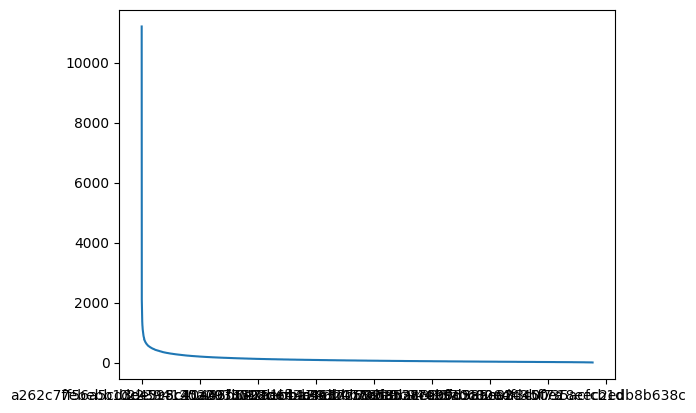

In [ ]:
df['USER_ID_hash의'].value_counts().plot()

In [ ]:
df['VIEW_COUPON_ID_hash'].value_counts()

a262c7ff56a5cd3de3c5c40443f3018c    11206
d0e1b63cb7cc32edc3a6c619e4215368     2835
39c215bfdebc9c2e945d4f63cb25a58d     2456
3d9029d3ec66802b11ee2645dc16e8cb     2344
909303b9db946c7a744083d054ad08ed     2138
                                    ...  
afd590ce12664dc3d20b7d5a3b76f498        1
3d9cc5232806e95d051bdc49316d300a        1
392d72c817a1b4b633d939d9f20bca51        1
ed3f9fa508a99d4bc626f44a60ec0083        1
332adf06e68630e6be7072d34cf386f4        1
Name: VIEW_COUPON_ID_hash, Length: 19404, dtype: int64

<Axes: >

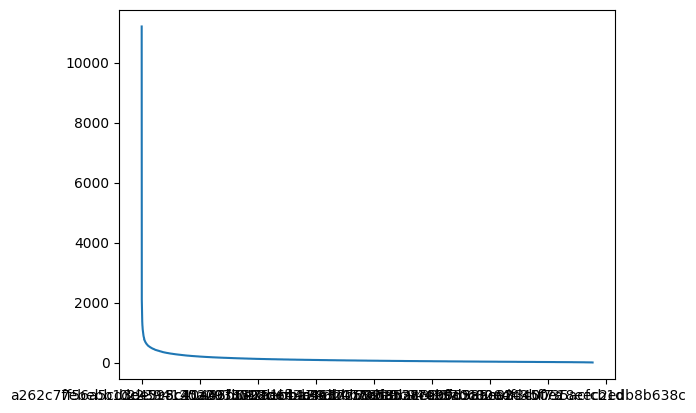

In [ ]:
df['VIEW_COUPON_ID_hash'].value_counts().plot()

# 3. 데이터 전처리

* 3-1. 명목형 변수 - Label Encoder 후 to_categorical()
* 3-2. 이진분류 및 정수형태의 명목형 변수 - to_categorical()
* 3-3. 연속형 변수 - 정규화/StandardScaler()

-------------------------------------------
## 3-1. 명목형 변수 - Label Encoder

 Embedding Layer 사용시 모델의 층이 많아지는 문제(모델 파라미터 약 16만) - 과대적합 발생 원인으르 분석하여 embedding layer을 사용하지 않고 원핫 인코딩 방식 사용: to_categorical() 사용

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


category_xs = []
category_encoders = []

def cate_one_hot(cat_col_names):
  """ 명목형 변수 cat_col_names를 정수형으로 변환하고 원핫인코딩하는 작업 """

  for col_name in cat_col_names:

    encoder = LabelEncoder()
    encoded_xs = encoder.fit_transform(df[col_name])
    encoded_xs = to_categorical(encoded_xs)

    category_xs.append(encoded_xs)
    category_encoders.append(encoder)


def bin_one_hot(bin_cate_cols):
  for bin_cate_col in bin_cate_cols:

    trans_1D_array = df[bin_cate_col].array
    trans_1D_array = to_categorical(trans_1D_array)
    category_xs.append(trans_1D_array)

In [ ]:
# 'USER_ID_hash', ,'VIEW_COUPON_ID_hash', 'small_area_name','capsule_text' 떨구기
# ID 해시값을 사용하지 않는 이유: 데이터가 무거워 돌아가지 않는 문제 - 임시로 drop하여 처리


cat_col_names = ['Tr_Pref_Name','Tr_small_area_name','usable_date_sum']

cate_one_hot(cat_col_names)

## 3-2. 이진분류 및 정수형태의 명목형 변수

In [ ]:
bin_cate_cols = ['PURCHASE_FLG','dispperiod', 'usable_date_mon', 'usable_date_tue',
       'usable_date_wed', 'usable_date_thu', 'usable_date_fri',
       'usable_date_sat', 'usable_date_sun', 'usable_date_holiday',
       'usable_date_before_holiday', 'Male', 'Female', 'usable_date_sum']


bin_one_hot(bin_cate_cols)

원-핫 인코딩
- 입력층에 들어가는 배열의 shape가 맞지 않는 문제
shape가 맞지 않으면 딥러닝 상에서 모델 학습이 안되는지는 시도해볼 필요가 있으나 전처리 과정이 길어질 것으로 예상


# <Embedding Layer사용>


## 1. 명목형 데이터 전처리

only LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

category_xs = []
category_encoders = []

def cate_LabelEncoding(cat_col_names):
  for col_name in cat_col_names:

    encoder = LabelEncoder()
    encoded_xs = encoder.fit_transform(df[col_name])

    category_xs.append(encoded_xs)
    category_encoders.append(encoder)


def bin_cate_col(bin_cate_cols):

  for bin_cate_col in bin_cate_cols:
    trans_1D_array = df[bin_cate_col].array
    category_xs.append(trans_1D_array)

In [ ]:
cat_col_names = ['Tr_Pref_Name','Tr_small_area_name','usable_date_sum']

bin_cate_cols = ['PURCHASE_FLG','dispperiod', 'usable_date_mon', 'usable_date_tue',
       'usable_date_wed', 'usable_date_thu', 'usable_date_fri',
       'usable_date_sat', 'usable_date_sun', 'usable_date_holiday',
       'usable_date_before_holiday', 'Male', 'Female', 'usable_date_sum']


cate_LabelEncoding(cat_col_names)
bin_cate_col(bin_cate_cols)

In [ ]:
category_xs = np.stack(category_xs, axis=1)
category_xs = category_xs.astype(float)
category_xs

array([[ 6., 52.,  0., ...,  1.,  0.,  0.],
       [10., 22.,  0., ...,  1.,  0.,  0.],
       [42., 44.,  0., ...,  0.,  1.,  0.],
       ...,
       [10., 30.,  9., ...,  1.,  0.,  9.],
       [42., 12.,  8., ...,  0.,  1.,  8.],
       [38., 44.,  9., ...,  0.,  1.,  9.]])

## 2. 숫자형 데이터 전처리

standarscaler()사용

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_col_names = ['AGE','view_count']

numeric_encoder = StandardScaler()
numeric_xs = numeric_encoder.fit_transform(df[numeric_col_names])
numeric_xs

array([[ 1.47657574,  0.1754719 ],
       [-1.15457048, -0.0022052 ],
       [-0.51946622, -0.29804195],
       ...,
       [ 0.20636722, -0.36281094],
       [-0.24727868, -0.32429965],
       [-1.0638413 , -0.26303168]])

# 타켓 변수 변환

* Translated_genre_name 사용

In [ ]:
np.unique(df['Translated_genre_name'])

array(['건강・의료', '기타 쿠폰', '기프트 카드', '네일・아이', '레슨', '레저', '뷰티', '에스테틱',
       '음식', '택배', '헤어 살롱', '호텔・여관', '휴식'], dtype=object)

In [ ]:
target_xs = []
target_encoders = []


encoder = LabelEncoder()
encoded_xs = encoder.fit_transform(df['Translated_genre_name'])

target_xs.append(encoded_xs)
target_encoders.append(encoder)

target_xs = np.stack(target_xs, axis=1)
target_xs

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [12],
       [12],
       [12]])

# 테이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

category_xs, numeric_xs, target_xs = shuffle(category_xs, numeric_xs, target_xs)

splitted = train_test_split(category_xs, numeric_xs, target_xs,
                            test_size=0.2,stratify=target_xs)

train_category_xs, train_numeric_xs, train_ys = splitted[::2]
test_category_xs, test_numeric_xs, test_ys = splitted[1::2]

In [ ]:
# 타켓 원-핫 인코딩
# https://stackoverflow.com/questions/61550026/valueerror-shapes-none-1-and-none-3-are-incompatible


train_ys = tf.keras.utils.to_categorical(train_ys, 13)
test_ys = tf.keras.utils.to_categorical(test_ys, 13)

## 명목형 입력값 임베딩
Embedding Layer 사용
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

LabelEncoder을 이용하면 지정된 정숫값의 서열이 있는 상태로 인코딩됨 해당 서열 정보를 없애주기 위해 딥러닝에서는 Embedding Layer를 사용할 수 있다.

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate


# 명목형 변수의 개수
category_inputs = Input((17,), dtype=tf.int32)

# 숫자형 변수의 개수
numeric_inputs = Input((2,), dtype=tf.float32)




embed_size = 3
# 임베딩 레이어 설정
embeds = []
for idx, col_name in enumerate(cat_col_names):
      # 각 변수 별 카테고리의 갯수
      category_size = len(category_encoders[idx].classes_)

      # 각 변수 별로 임베딩 레이어 적용 (-> 각 변수 내 카테고리별로 임베딩 값들이 모델에서 학습)
      category_embeded = Embedding(
          category_size, embed_size, name=col_name+'_embed')(category_inputs[:,idx])

      embeds.append(category_embeded)
print(embeds)


# 명목형 변수와 수치형 변수 합치기

inputs_list = embeds + [numeric_inputs]
concats = Concatenate(name='embed_concat')(inputs_list)
concats

[<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'Tr_Pref_Name_embed')>, <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'Tr_small_area_name_embed')>, <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'usable_date_sum_embed')>]


<KerasTensor: shape=(None, 11) dtype=float32 (created by layer 'embed_concat')>

# 딥러닝 모델 구성

* 하이퍼 파라미터 조정
1) 은닉층 개수 - 2개 고정
2) 옵티마이저  - Adam 고정
3) 드롭아옷 - 0.5 고정
4) 층의 뉴런 개수(neuron_counts) = [13,50,100]
5) batch_size =  [64,512,1028]
6) learning_rate = [0.1,0.01, 0.001]


과적합 방지를 위해 L2규제 사용


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

def model_builder(neuron_count):
  hidden = Dense(neuron_count,activation='relu', name='hidden1',
                kernel_regularizer=l2(1e-5))(concats)

  hidden = Dropout(0.5, name='dropout1')(hidden)

  hidden = Dense(neuron_count,activation='relu', name='hidden2',
                kernel_regularizer=l2(1e-5))(hidden)
  hidden = Dropout(0.5, name='dropout2')(hidden)

  output = Dense(13, activation='softmax', name='output',
                kernel_regularizer=l2(1e-5))(hidden)

  model = Model([category_inputs, numeric_inputs], output)


  return model

In [ ]:
neuron_counts = [13,50,100]

model1 = model_builder(neuron_counts[0])
model2 = model_builder(neuron_counts[1])
model3 = model_builder(neuron_counts[2])


model1.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 tf.__operators__.getitem_3 (Sl  (None,)             0           ['input_5[0][0]']                
 icingOpLambda)                                                                                   
                                                                                                  
 tf.__operators__.getitem_4 (Sl  (None,)             0           ['input_5[0][0]']                
 icingOpLambda)                                                                                   
                                                                                           

### model1_1
* 각 층의 뉴런 13개/배치 64/학습률 0.1

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.1)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')

  # 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]


history = model1.fit(x=train_xs, y=train_ys,
            batch_size=64, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
22882/22882 [==============================] - 57s 2ms/step - loss: 1.7596 - accuracy: 0.2784 - val_loss: 1.7568 - val_accuracy: 0.2903
Epoch 2/100
22882/22882 [==============================] - 52s 2ms/step - loss: 1.7596 - accuracy: 0.2778 - val_loss: 1.7572 - val_accuracy: 0.2903
Epoch 3/100
22882/22882 [==============================] - 51s 2ms/step - loss: 1.7598 - accuracy: 0.2783 - val_loss: 1.7637 - val_accuracy: 0.2903
Epoch 4/100
22882/22882 [==============================] - 52s 2ms/step - loss: 1.7595 - accuracy: 0.2780 - val_loss: 1.7611 - val_accuracy: 0.2903
Epoch 5/100
22882/22882 [==============================] - 50s 2ms/step - loss: 1.7596 - accuracy: 0.2780 - val_loss: 1.7587 - val_accuracy: 0.2635
Epoch 6/100
22882/22882 [==============================] - 52s 2ms/step - loss: 1.7598 - accuracy: 0.2782 - val_loss: 1.7700 - val_accuracy: 0.2635


In [ ]:
def acc_lossplot(model, name):
  loss, acc = model.evaluate(x=[test_category_xs, test_numeric_xs], y=test_ys, verbose=1)
  print(f"딥러닝 모형의 정확도 : {acc:.3%}")

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')

  plt.title(name)
  plt.legend(['train', 'val'])
  plt.show()



12712/12712 [==============================] - 49s 4ms/step - loss: 1.7565 - accuracy: 0.2886
딥러닝 모형의 정확도 : 28.859%


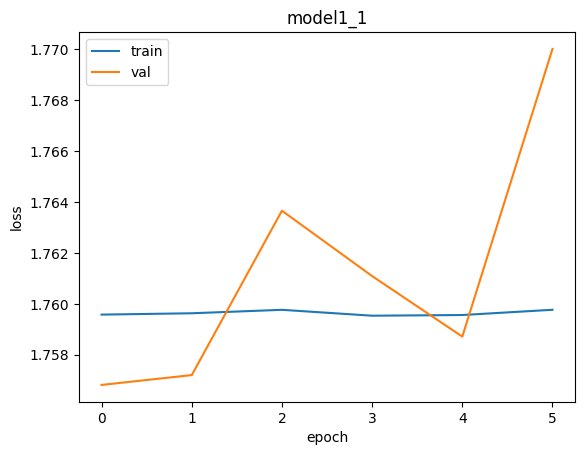

In [ ]:
acc_lossplot(model1, 'model1_1')

### model1_2
* 각 층의 뉴런 13개/배치 64/학습률 0.01

In [ ]:
model1_2 = model_builder(neuron_counts[0])

In [ ]:
opt = Adam(learning_rate = 0.01)
model1_2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_2.fit(x=train_xs, y=train_ys,
            batch_size=64, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
22882/22882 [==============================] - 55s 2ms/step - loss: 1.0823 - accuracy: 0.6630 - val_loss: 0.9268 - val_accuracy: 0.7075
Epoch 2/100
22882/22882 [==============================] - 51s 2ms/step - loss: 1.0634 - accuracy: 0.6686 - val_loss: 0.9298 - val_accuracy: 0.7101
Epoch 3/100
22882/22882 [==============================] - 54s 2ms/step - loss: 1.0583 - accuracy: 0.6702 - val_loss: 0.9298 - val_accuracy: 0.7089
Epoch 4/100
22882/22882 [==============================] - 54s 2ms/step - loss: 1.0648 - accuracy: 0.6687 - val_loss: 0.9363 - val_accuracy: 0.7098
Epoch 5/100
22882/22882 [==============================] - 51s 2ms/step - loss: 1.0649 - accuracy: 0.6700 - val_loss: 0.9354 - val_accuracy: 0.7066
Epoch 6/100
22882/22882 [==============================] - 52s 2ms/step - loss: 1.0700 - accuracy: 0.6669 - val_loss: 0.9250 - val_accuracy: 0.7120
Epoch 7/100
22882/22882 [==============================] - 50s 2ms/step - loss: 1.0684 - accuracy: 0.6670 - val_

12712/12712 [==============================] - 19s 2ms/step - loss: 0.9266 - accuracy: 0.7116
딥러닝 모형의 정확도 : 71.162%


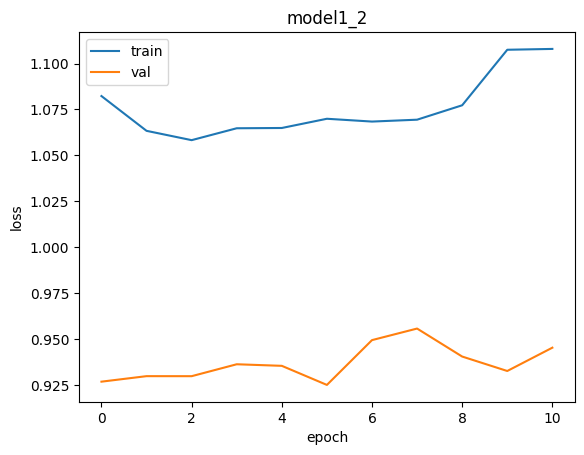

In [ ]:
acc_lossplot(model1_2, 'model1_2')

### model1_3

* 각 층의 뉴런 13개/배치 64/학습률 0.001

In [ ]:
model1_3= model_builder(neuron_counts[0])

In [ ]:
opt = Adam(learning_rate = 0.001)
model1_3.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


# 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)

train_xs = [train_category_xs,train_numeric_xs]


history = model1_3.fit(x=train_xs, y=train_ys,
            batch_size=64, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
22882/22882 [==============================] - 58s 2ms/step - loss: 1.1009 - accuracy: 0.6573 - val_loss: 0.8879 - val_accuracy: 0.7127
Epoch 2/100
22882/22882 [==============================] - 53s 2ms/step - loss: 0.9895 - accuracy: 0.6819 - val_loss: 0.8968 - val_accuracy: 0.7068
Epoch 3/100
22882/22882 [==============================] - 59s 3ms/step - loss: 0.9835 - accuracy: 0.6862 - val_loss: 0.8832 - val_accuracy: 0.7108
Epoch 4/100
22882/22882 [==============================] - 58s 3ms/step - loss: 0.9829 - accuracy: 0.6861 - val_loss: 0.8820 - val_accuracy: 0.7099
Epoch 5/100
22882/22882 [==============================] - 63s 3ms/step - loss: 0.9806 - accuracy: 0.6866 - val_loss: 0.8770 - val_accuracy: 0.7097
Epoch 6/100
22882/22882 [==============================] - 62s 3ms/step - loss: 0.9792 - accuracy: 0.6866 - val_loss: 0.8736 - val_accuracy: 0.7133
Epoch 7/100
22882/22882 [==============================] - 53s 2ms/step - loss: 0.9774 - accuracy: 0.6866 - val_

12712/12712 [==============================] - 20s 2ms/step - loss: 0.8571 - accuracy: 0.7136
딥러닝 모형의 정확도 : 71.359%


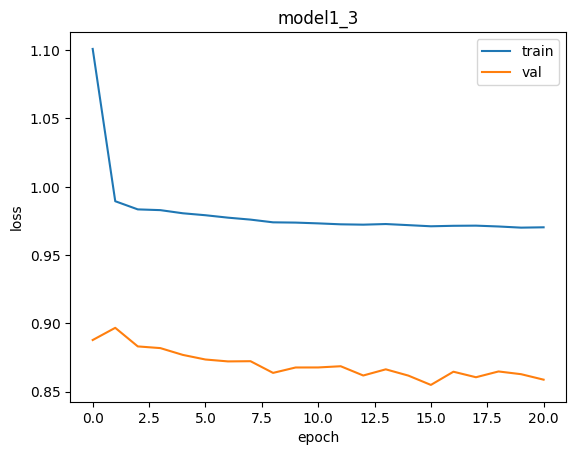

In [ ]:
acc_lossplot(model1_3, 'model1_3')


### model1_4

* 각 층의 뉴런 13개/배치 256/학습률 0.1

In [ ]:
model1_4=model_builder(neuron_counts[0])

In [ ]:
opt = Adam(learning_rate = 0.1)
model1_4.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')

  # 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_4.fit(x=train_xs, y=train_ys,
            batch_size=256, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
5721/5721 [==============================] - 16s 3ms/step - loss: 1.4717 - accuracy: 0.4864 - val_loss: 1.2634 - val_accuracy: 0.5536
Epoch 2/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.5489 - accuracy: 0.4350 - val_loss: 1.7789 - val_accuracy: 0.2903
Epoch 3/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.5173 - accuracy: 0.4543 - val_loss: 1.2396 - val_accuracy: 0.5536
Epoch 4/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.4625 - accuracy: 0.4788 - val_loss: 1.2607 - val_accuracy: 0.5532
Epoch 5/100
5721/5721 [==============================] - 16s 3ms/step - loss: 1.5729 - accuracy: 0.4255 - val_loss: 1.7892 - val_accuracy: 0.2903
Epoch 6/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.5857 - accuracy: 0.4195 - val_loss: 1.2593 - val_accuracy: 0.5368
Epoch 7/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.5372 - accuracy: 0.4413 - val_loss: 1.7713 -

12712/12712 [==============================] - 20s 2ms/step - loss: 1.7565 - accuracy: 0.2886
딥러닝 모형의 정확도 : 28.859%


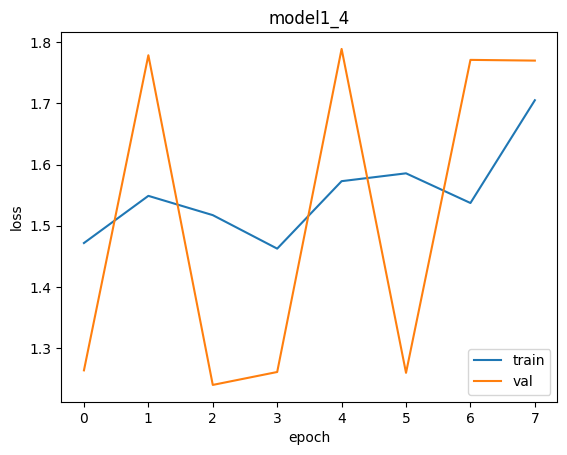

In [ ]:
acc_lossplot(model1, 'model1_4')

### model1_5

* 각 층의 뉴런 13개/배치 256/학습률 0.01

In [ ]:
model1_5= model_builder(neuron_counts[0])

In [ ]:
opt = Adam(learning_rate = 0.01)
model1_5.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


  # 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_5.fit(x=train_xs, y=train_ys,
            batch_size=256, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
5721/5721 [==============================] - 17s 3ms/step - loss: 1.0525 - accuracy: 0.6595 - val_loss: 0.8928 - val_accuracy: 0.7089
Epoch 2/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.0158 - accuracy: 0.6641 - val_loss: 0.9053 - val_accuracy: 0.7004
Epoch 3/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.0133 - accuracy: 0.6643 - val_loss: 0.8809 - val_accuracy: 0.7121
Epoch 4/100
5721/5721 [==============================] - 22s 4ms/step - loss: 1.0114 - accuracy: 0.6662 - val_loss: 0.8760 - val_accuracy: 0.7124
Epoch 5/100
5721/5721 [==============================] - 23s 4ms/step - loss: 1.0102 - accuracy: 0.6663 - val_loss: 0.8923 - val_accuracy: 0.7133
Epoch 6/100
5721/5721 [==============================] - 22s 4ms/step - loss: 1.0097 - accuracy: 0.6662 - val_loss: 0.8791 - val_accuracy: 0.7101
Epoch 7/100
5721/5721 [==============================] - 17s 3ms/step - loss: 1.0098 - accuracy: 0.6667 - val_loss: 0.8874 -

12712/12712 [==============================] - 20s 2ms/step - loss: 0.8771 - accuracy: 0.7110
딥러닝 모형의 정확도 : 71.098%


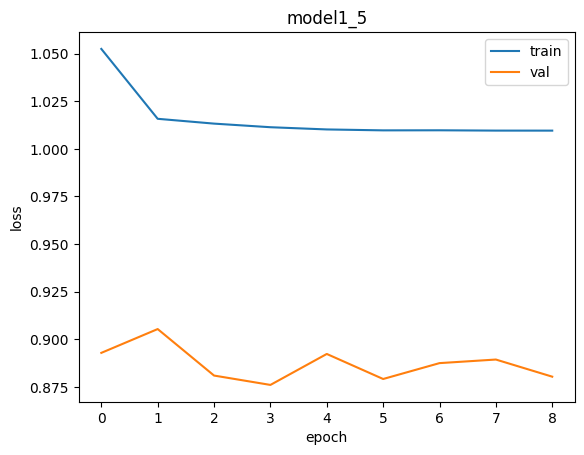

In [ ]:
acc_lossplot(model1_5, 'model1_5')

### model1_6

* 각 층의 뉴런 13개/배치 256/학습률 0.001

In [ ]:
model1_6 = model_builder(neuron_counts[0])

opt = Adam(learning_rate = 0.001)
model1_6.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


  # 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_6.fit(x=train_xs, y=train_ys,
            batch_size=256, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
5721/5721 [==============================] - 17s 3ms/step - loss: 1.4509 - accuracy: 0.5891 - val_loss: 0.9319 - val_accuracy: 0.7110
Epoch 2/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.0156 - accuracy: 0.6785 - val_loss: 0.8892 - val_accuracy: 0.7208
Epoch 3/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.9958 - accuracy: 0.6818 - val_loss: 0.8852 - val_accuracy: 0.7220
Epoch 4/100
5721/5721 [==============================] - 14s 3ms/step - loss: 0.9929 - accuracy: 0.6823 - val_loss: 0.8862 - val_accuracy: 0.7225
Epoch 5/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.9905 - accuracy: 0.6830 - val_loss: 0.8833 - val_accuracy: 0.7231
Epoch 6/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.9867 - accuracy: 0.6827 - val_loss: 0.8771 - val_accuracy: 0.7226
Epoch 7/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.9782 - accuracy: 0.6835 - val_loss: 0.8697 -

12712/12712 [==============================] - 19s 1ms/step - loss: 0.8185 - accuracy: 0.7227
딥러닝 모형의 정확도 : 72.271%


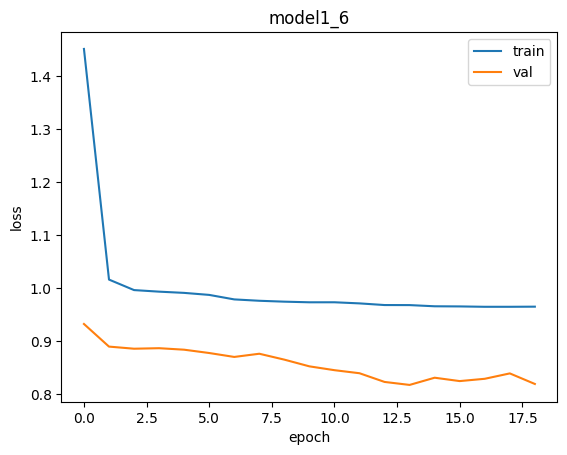

In [ ]:
acc_lossplot(model1_6, 'model1_6')

### model1_7

* 각 층의 뉴런 13개/배치 512/학습률 0.1

In [ ]:
model1_7 = model_builder(neuron_counts[0])

In [ ]:
opt = Adam(learning_rate = 0.1)
model1_7.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_7.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 12s 4ms/step - loss: 1.2489 - accuracy: 0.5454 - val_loss: 1.1466 - val_accuracy: 0.5370
Epoch 2/100
2861/2861 [==============================] - 9s 3ms/step - loss: 1.2915 - accuracy: 0.5201 - val_loss: 1.1513 - val_accuracy: 0.5536
Epoch 3/100
2861/2861 [==============================] - 9s 3ms/step - loss: 1.3243 - accuracy: 0.5114 - val_loss: 1.1615 - val_accuracy: 0.5536
Epoch 4/100
2861/2861 [==============================] - 9s 3ms/step - loss: 1.3779 - accuracy: 0.4958 - val_loss: 1.1988 - val_accuracy: 0.5536
Epoch 5/100
2861/2861 [==============================] - 9s 3ms/step - loss: 1.4433 - accuracy: 0.4728 - val_loss: 1.3071 - val_accuracy: 0.5370
Epoch 6/100
2861/2861 [==============================] - 8s 3ms/step - loss: 1.4247 - accuracy: 0.4797 - val_loss: 1.7929 - val_accuracy: 0.2904


12712/12712 [==============================] - 23s 2ms/step - loss: 1.1479 - accuracy: 0.5359
딥러닝 모형의 정확도 : 53.590%


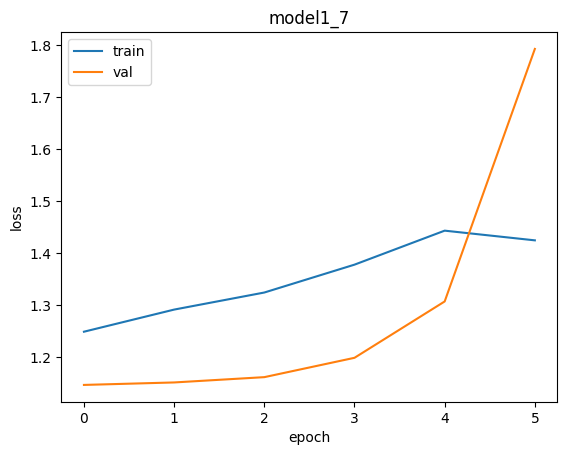

In [ ]:
acc_lossplot(model1_7, 'model1_7')

### model1_8

* 각 층의 뉴런 13개/배치 512/학습률 0.01

In [ ]:
model1_8 = model_builder(neuron_counts[0])

In [ ]:
opt = Adam(learning_rate = 0.01)
model1_8.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_8.fit(x=train_xs, y=train_ys,
            batch_size=1028, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1425/1425 [==============================] - 8s 5ms/step - loss: 1.1153 - accuracy: 0.6589 - val_loss: 0.8813 - val_accuracy: 0.7144
Epoch 2/100
1425/1425 [==============================] - 5s 4ms/step - loss: 0.9829 - accuracy: 0.6818 - val_loss: 0.8654 - val_accuracy: 0.7187
Epoch 3/100
1425/1425 [==============================] - 6s 4ms/step - loss: 0.9744 - accuracy: 0.6839 - val_loss: 0.8576 - val_accuracy: 0.7191
Epoch 4/100
1425/1425 [==============================] - 5s 4ms/step - loss: 0.9721 - accuracy: 0.6842 - val_loss: 0.8584 - val_accuracy: 0.7210
Epoch 5/100
1425/1425 [==============================] - 6s 4ms/step - loss: 0.9716 - accuracy: 0.6843 - val_loss: 0.8560 - val_accuracy: 0.7204
Epoch 6/100
1425/1425 [==============================] - 5s 4ms/step - loss: 0.9704 - accuracy: 0.6846 - val_loss: 0.8641 - val_accuracy: 0.7204
Epoch 7/100
1425/1425 [==============================] - 5s 4ms/step - loss: 0.9708 - accuracy: 0.6844 - val_loss: 0.8541 - val_ac

12712/12712 [==============================] - 20s 2ms/step - loss: 0.8480 - accuracy: 0.7205
딥러닝 모형의 정확도 : 72.051%


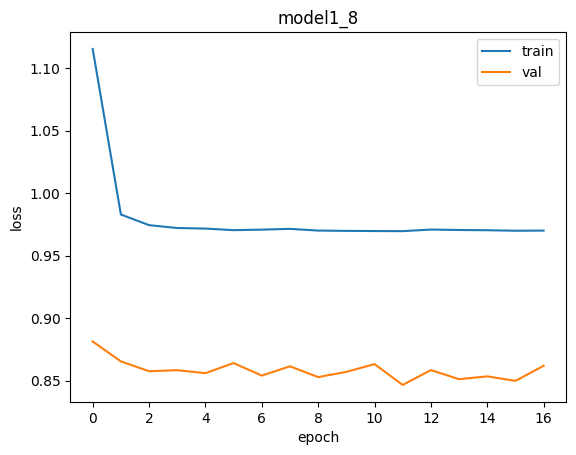

In [ ]:
acc_lossplot(model1_8, 'model1_8')

### model1_9

* 각 층의 뉴런 13개/배치 1028/학습률 0.001

In [ ]:
model1_9 = model_builder(neuron_counts[0])

In [ ]:
opt = Adam(learning_rate = 0.001)
model1_9.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_9.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 11s 3ms/step - loss: 1.3413 - accuracy: 0.6080 - val_loss: 0.9143 - val_accuracy: 0.7065
Epoch 2/100
2861/2861 [==============================] - 9s 3ms/step - loss: 1.0036 - accuracy: 0.6835 - val_loss: 0.8743 - val_accuracy: 0.7203
Epoch 3/100
2861/2861 [==============================] - 8s 3ms/step - loss: 0.9762 - accuracy: 0.6902 - val_loss: 0.8591 - val_accuracy: 0.7210
Epoch 4/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.9695 - accuracy: 0.6912 - val_loss: 0.8527 - val_accuracy: 0.7223
Epoch 5/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.9634 - accuracy: 0.6918 - val_loss: 0.8493 - val_accuracy: 0.7205
Epoch 6/100
2861/2861 [==============================] - 8s 3ms/step - loss: 0.9586 - accuracy: 0.6910 - val_loss: 0.8436 - val_accuracy: 0.7203
Epoch 7/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.9560 - accuracy: 0.6907 - val_loss: 0.8302 - val_a

12712/12712 [==============================] - 19s 2ms/step - loss: 0.8256 - accuracy: 0.7218
딥러닝 모형의 정확도 : 72.184%


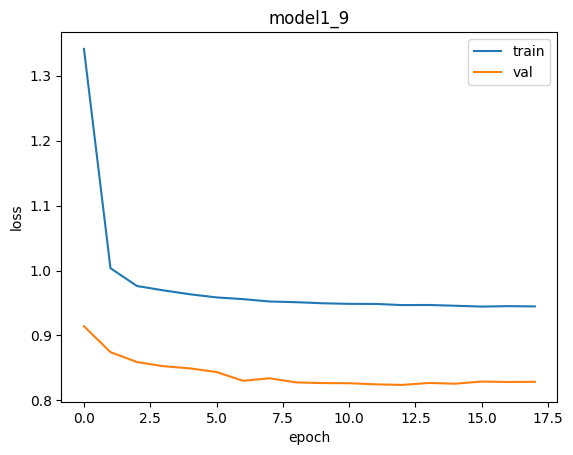

In [ ]:
acc_lossplot(model1_9, 'model1_9')

### model2

* 각 층의 뉴런 50개/batch=512/lr = 0.001


In [ ]:
model2 = model_builder(neuron_counts[1])
model3 = model_builder(neuron_counts[2])

In [ ]:
model2.summary()

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 tf.__operators__.getitem_3 (Sl  (None,)             0           ['input_5[0][0]']                
 icingOpLambda)                                                                                   
                                                                                                  
 tf.__operators__.getitem_4 (Sl  (None,)             0           ['input_5[0][0]']                
 icingOpLambda)                                                                                   
                                                                                           

In [ ]:
opt = Adam(learning_rate = 0.001)
model2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model2.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 20s 7ms/step - loss: 1.0481 - accuracy: 0.6936 - val_loss: 0.7631 - val_accuracy: 0.7400
Epoch 2/100
2861/2861 [==============================] - 15s 5ms/step - loss: 0.7940 - accuracy: 0.7358 - val_loss: 0.7078 - val_accuracy: 0.7499
Epoch 3/100
2861/2861 [==============================] - 14s 5ms/step - loss: 0.7569 - accuracy: 0.7447 - val_loss: 0.6871 - val_accuracy: 0.7618
Epoch 4/100
2861/2861 [==============================] - 13s 5ms/step - loss: 0.7448 - accuracy: 0.7482 - val_loss: 0.6849 - val_accuracy: 0.7639
Epoch 5/100
2861/2861 [==============================] - 13s 5ms/step - loss: 0.7405 - accuracy: 0.7498 - val_loss: 0.6812 - val_accuracy: 0.7657
Epoch 6/100
2861/2861 [==============================] - 12s 4ms/step - loss: 0.7357 - accuracy: 0.7508 - val_loss: 0.6741 - val_accuracy: 0.7682
Epoch 7/100
2861/2861 [==============================] - 13s 5ms/step - loss: 0.7339 - accuracy: 0.7514 - val_loss: 0.6723 -

12712/12712 [==============================] - 20s 2ms/step - loss: 0.6617 - accuracy: 0.7695
딥러닝 모형의 정확도 : 76.947%


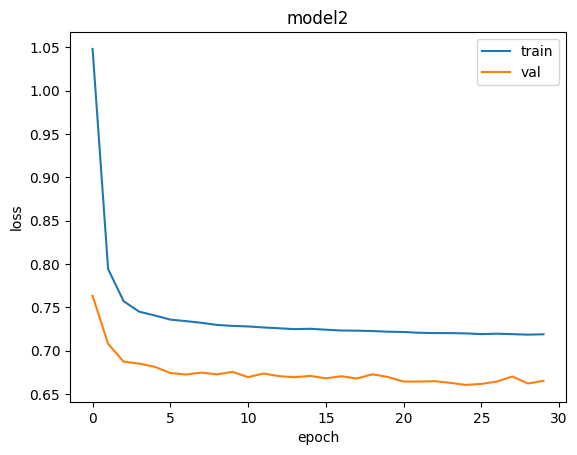

In [ ]:
acc_lossplot(model2, 'model2')

### model3

* 각 층의 뉴런의 개수 100/batch=512/lr = 0.001

In [ ]:
model3.summary()

Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 tf.__operators__.getitem_3 (Sl  (None,)             0           ['input_5[0][0]']                
 icingOpLambda)                                                                                   
                                                                                                  
 tf.__operators__.getitem_4 (Sl  (None,)             0           ['input_5[0][0]']                
 icingOpLambda)                                                                                   
                                                                                           

In [ ]:
opt = Adam(learning_rate = 0.001)
model3.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model3.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 22s 7ms/step - loss: 0.9004 - accuracy: 0.7174 - val_loss: 0.6918 - val_accuracy: 0.7622
Epoch 2/100
2861/2861 [==============================] - 18s 6ms/step - loss: 0.7227 - accuracy: 0.7534 - val_loss: 0.6627 - val_accuracy: 0.7697
Epoch 3/100
2861/2861 [==============================] - 20s 7ms/step - loss: 0.7000 - accuracy: 0.7595 - val_loss: 0.6497 - val_accuracy: 0.7706
Epoch 4/100
2861/2861 [==============================] - 19s 7ms/step - loss: 0.6911 - accuracy: 0.7625 - val_loss: 0.6428 - val_accuracy: 0.7761
Epoch 5/100
2861/2861 [==============================] - 20s 7ms/step - loss: 0.6865 - accuracy: 0.7642 - val_loss: 0.6412 - val_accuracy: 0.7743
Epoch 6/100
2861/2861 [==============================] - 19s 7ms/step - loss: 0.6838 - accuracy: 0.7650 - val_loss: 0.6355 - val_accuracy: 0.7775
Epoch 7/100
2861/2861 [==============================] - 20s 7ms/step - loss: 0.6812 - accuracy: 0.7662 - val_loss: 0.6374 -

12712/12712 [==============================] - 21s 2ms/step - loss: 0.6214 - accuracy: 0.7829
딥러닝 모형의 정확도 : 78.289%


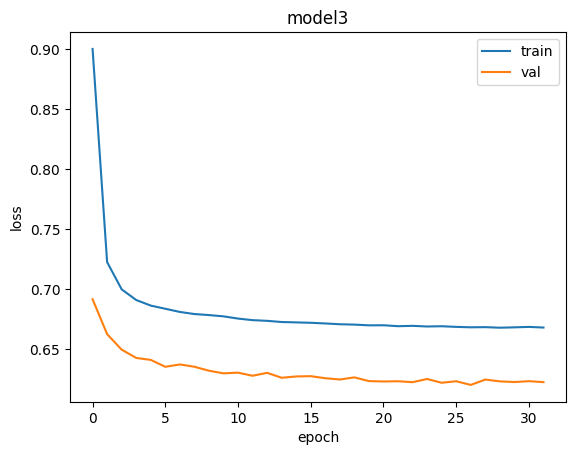

In [ ]:
acc_lossplot(model3, 'model3')

In [159]:
# model1_1.save('model1_1.h5')
# model1_2.save('model1_2.h5')
# model1_3.save('model1_3.h5')
# model1_4.save('model1_4.h5')
# model1_5.save('model1_5.h5')
# model1_6.save('model1_6.h5')
# model1_7.save('model1_7.h5')
# model1_8.save('model1_8.h5')
# model1_9.save('model1_9.h5')

# model2.save('model2.h5')
# model3.save('model3.h5')